In [1]:
#!/usr/bin/env python
# vim: set fileencoding=utf-8 :

__author__ = ' AUTOR: Tomás Sánchez Sánchez-Pastor'

''' RNN Bidireccional en Keras '''


"""Imports: librerias"""
import os
import math
from math import sqrt
import sys
import numpy
import numpy as np
np.random.seed(0)
import random
random.seed(0)
import scipy.stats
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from time import time

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D, AveragePooling1D
from keras.initializers import glorot_uniform

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


import pandas as pd  

import tensorflow as tf

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as mdates


##Para cambiar las fuentes
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'
mpl.rcParams['axes.labelsize'] = 'large'

import matplotlib as mpl
np.set_printoptions(threshold=np.inf)

import pdb # Para depurar
import copy

Using TensorFlow backend.


In [2]:
"""
# Medians Rn222 HallA
mdnRnA=[87.0, 88.0, 112.0, 99.0, 102.0, 86.0, 100.0, 88.0, 75.0, 94.0 ,80.0, 86.0, 76.0, 75.0 ,78.0, 67.0 ,67.0, 79.0 ,54.0, 66.0, 63.0, 60.5, 54.0, 63.0, 65.0, 73.0, 84.0, 70.0, 72.5, 77.0, 74.0, 84.0, 81.0, 81.5, 97.0, 97.0, 92.0, 80.0, 87.0, 90.0, 74.0, 75.0, 78.0, 82.0, 78.0, 75.0, 67.0, 74.0, 89.0, 86.0, 81.0, 85.0, 84.0, 81.0, 79.0, 99.0, 114.0, 94.0, 64.0, 76.0, 69.0, 74.0, 71.0, 79.0, 68.0, 64.0, 62.0, 67.0, 60.0, 64.0, 73.0, 68.0, 60.0, 72.0, 71.0, 71.0, 68.0, 77.0, 67.0, 46.0, 75.0, 86.0, 80.0, 88.0, 85.0, 61.0, 80.0, 98.0, 108.0, 89.0, 68.0, 65.0, 91.0,96.0, 106.5, 108.0, 106.5, 109.5, 104.0, 110.0, 86.0, 85.0, 89.0, 85.0, 71.0, 82.5, 75.0, 83.0, 73.0, 57.0, 55.0, 60.0, 63.0, 66.0, 79.0, 74.0, 81.0, 72.5, 67.0, 79.0, 73.0, 73.0, 70.0, 78.5, 69.0, 69.0, 65.0, 75.0, 72.0, 71.0, 72.5, 82.0, 100.0, 97.0, 97.0, 92.0, 101.0, 102.0, 73.0, 69.0, 72.0, 66.5, 72.0, 65.5, 75.5, 73.0, 63.0, 89.0, 98.0, 69.0 , 84.0, 81.0, 77.0, 65.0, 70.0, 87.0, 74.0, 66.0, 80.0, 69.0, 66.0, 62.0, 67.0, 65.0, 74.0, 77.0, 81.0, 79.0, 65.0, 72.0, 81.0, 70.0, 70.0, 70.0, 79.0, 81.0, 91.0, 84.0,73.5, 99.0, 101.0, 67.0, 76.0, 70.0, 74.0, 73.0, 80.0, 77.0, 104.0, 74.0, 80.0, 80.0, 86.0, 105.0, 97.0, 93.5, 92.0,76.0, 68.0, 56.0, 59.0, 72.0, 68.0, 79.0, 64.0, 71.5, 76.0, 74.0, 59.0, 74.0, 64.0, 68.0, 64.0, 67.0, 70.0, 77.0, 67.0, 71.0, 80.0, 84.0, 83.0, 70.0, 70.0, 95.0, 102.0, 109.0, 88.0, 89.0]
print(len(mdnRnA))
"""

# Medians Rn222 HallA (correcto 52 semanas X 5 años =259 valores)
mdnRnA=[90, 79, 99, 117, 99, 99, 86, 95, 93, 69, 87, 94, 74, 90, 76, 71, 87, 60, 72, 73, 77, 51, 66, 58, 63, 52.5, 67, 63, 78, 84, 69, 75, 77, 71, 82, 85, 82, 81.5, 94, 99, 97, 78, 93.5, 80, 92, 74, 71, 83, 70, 80, 86, 61, 77.6969111969112, 70, 83, 95, 82, 86, 83, 83, 82, 79, 101, 122, 100, 74, 70, 70, 70, 74, 73, 83, 66, 60, 66, 62, 60, 69, 67, 71, 68, 60, 68, 73, 66, 67, 72, 77, 67, 47, 68, 85.5, 84, 78, 89, 81, 61, 75, 99, 104, 83, 77.6969111969112, 62, 70, 91, 98, 103, 112, 105, 111, 109, 99, 110, 88, 82.5, 99, 81, 79, 72, 80, 75, 86, 77, 61, 56, 55, 66, 60, 71, 71, 74, 72, 54, 65, 74, 75, 76, 72, 69, 78.5, 67, 72, 63, 69, 87, 71, 71, 72.5, 75, 93, 89, 100, 96, 96, 101, 102, 70.5, 72, 74, 67, 68, 70, 65, 75.5, 72, 65, 80, 95, 94.5, 71, 84.5, 81, 78, 71, 66, 83, 85, 62, 73, 80, 69, 66, 63, 63, 69, 68, 78.5, 78, 78, 79, 67, 69, 82, 78, 61, 73.5, 70, 79, 81.5, 83, 90, 79, 99, 97, 95, 67, 79.5, 65, 80, 74, 70.5, 79, 78, 104, 77, 74, 87, 84, 94, 109, 91, 93.5, 95, 76, 72, 61, 57, 59, 70, 68, 82, 67, 69, 73, 76, 70, 57, 75, 63, 72, 64, 66, 70, 81, 68, 74, 72, 79, 84, 81, 69, 77, 74, 97, 103, 107, 88, 96, 101]

print("Length of the dataset: ",len(mdnRnA), "\nTrain_Size: ",0.7*len(mdnRnA), "\nTest_Size: ",int(round(0.3*len(mdnRnA)))  )

# New values 
# It starts first week of July 2018 until 23th Sept 2018 (12 weeks)
newValuesReal=[90, 106, 99, 104, 90, 80, 99, 100, 98, 85, 96, 84]

################ ANN's en Keras ###################
# 
dataset = mdnRnA

Length of the dataset:  259 
Train_Size:  181.29999999999998 
Test_Size:  78


In [3]:
sample_size = 52 
ahead = len(newValuesReal)
dataset = np.asarray(dataset)
nepochs=40

In [4]:
assert 0 < sample_size < dataset.shape[0] 

# Aquí ha pasado a array la lista con los datos, saca por pantalla la longitud de los datos de entrenamiento y de los de test
# y comprueba que las dimensiones del dataset son correctas. El algoritmo pasará por los datos 40 veces.
#############################################################################################################################

## Creacion de las muestras a partir del array normalizado ##
X = np.atleast_3d(np.array([dataset[start:start + sample_size] 
    for start in range(0, dataset.shape[0]-sample_size)]))
# La lista comprimida crea ventanas de 52 datos empezando desde 0 hasta 52, lo convierte en array
# y con atleast_3d lo convierte en una matriz tridimensional

In [5]:
y = dataset[sample_size:]
qf = np.atleast_3d([dataset[-sample_size:]]) 

In [6]:
# Separamos en datos de entrenamiento y evaluacion
#test_size = 52
test_size = int(0.3*len(mdnRnA))

trainX, testX = X[:-test_size], X[-test_size:]
trainY, testY = y[:-test_size], y[-test_size:]
print("trainX.shape = ", trainX.shape, "\ntrainY.shape = ", trainY.shape)

nextSteps = np.empty((ahead+1,sample_size,1))
nextSteps[0,:,:]= np.atleast_3d(np.array([dataset[start:start + sample_size] 
    for start in range(dataset.shape[0]-sample_size,dataset.shape[0]-sample_size+1)]))

trainX.shape =  (130, 52, 1) 
trainY.shape =  (130,)


In [7]:
# Convolutional model:
model = Sequential()
neurons = [64, 32]
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(52, 1), 
                kernel_initializer=glorot_uniform(seed=0)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(neurons[0], activation='relu'))
model.add(Dense(neurons[1], activation='relu'))
model.add(Dense(1))

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


In [9]:
model.compile(loss="mse", optimizer="adam", metrics=["acc"])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 51, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 104,769
Trainable params: 104,769
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(trainX, trainY, epochs=40, batch_size=10, verbose=0, validation_data=(testX, testY)) 
print(history.history.keys())

dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])


In [12]:
pred = model.predict(testX)

In [13]:
acc_train = np.average(history.history["acc"])
acc_test = np.average(history.history["val_acc"])
print("Train Accuracy: ", acc_train, "\nTest Accuracy:  ", acc_test)

Train Accuracy:  0.03153846203707732 
Test Accuracy:   0.03571428627549828


In [14]:
# Calcular ECM y EAM
testScoreECM = mean_squared_error(testY, pred)
print('ECM: %.4f' % (testScoreECM))

testScoreEAM = mean_absolute_error(testY, pred)
print('EAM: %.4f' % (testScoreEAM))

ECM: 111.5237
EAM: 8.2110


In [15]:
''' predecir el futuro. '''
newValues = np.zeros(ahead)
temp=np.zeros(sample_size)

for i in range(ahead):
    #print('ahead',i)
    #print('prediccion ', model.predict(nextSteps[None,i,:]), scaler.inverse_transform(model.predict(nextSteps[None,i,:])) )
    temp=nextSteps[i,1:,:]
    #print(temp, len(temp))
    temp = np.append(temp,model.predict(nextSteps[None,i,:]), axis=0)
    newValues[i] = model.predict(nextSteps[None,i,:])
    #print(temp, len(temp))

    #print(nextSteps[i,:,:])
    nextSteps[i+1,:,:]= temp
    #print(nextSteps[i+1,:,:])

# Calcular ECM y EAM for ahead values
#print('ECM ahead: %.4f' % (mean_squared_error(newValuesReal, newValues)))
#print('EAM ahead: %.4f' % (mean_absolute_error(newValuesReal, newValues)))

#print(model.output_shape)
#print(model.summary())
#print(model.get_config())


startday = pd.datetime(2013, 7, 1)
startdaypred = pd.datetime(2013, 7, 1) + 7*pd.Timedelta( len(mdnRnA)-len(pred), unit='D')
startdayahead = pd.datetime(2013, 7, 1) + 7*pd.Timedelta( len(mdnRnA), unit='D')
#print(startday,startdaypred,startdayahead)

In [57]:
fechas = pd.date_range(startday, periods=len(mdnRnA), freq='W').union(pd.date_range(startdaypred, periods=len(pred), freq='W'))
print(fechas.strftime("%Y-%m-%d").tolist())
np.savetxt('fechas.txt', fechas.strftime("%Y-%m-%d").tolist(), delimiter=',', fmt='%s')

['2013-07-07', '2013-07-14', '2013-07-21', '2013-07-28', '2013-08-04', '2013-08-11', '2013-08-18', '2013-08-25', '2013-09-01', '2013-09-08', '2013-09-15', '2013-09-22', '2013-09-29', '2013-10-06', '2013-10-13', '2013-10-20', '2013-10-27', '2013-11-03', '2013-11-10', '2013-11-17', '2013-11-24', '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22', '2013-12-29', '2014-01-05', '2014-01-12', '2014-01-19', '2014-01-26', '2014-02-02', '2014-02-09', '2014-02-16', '2014-02-23', '2014-03-02', '2014-03-09', '2014-03-16', '2014-03-23', '2014-03-30', '2014-04-06', '2014-04-13', '2014-04-20', '2014-04-27', '2014-05-04', '2014-05-11', '2014-05-18', '2014-05-25', '2014-06-01', '2014-06-08', '2014-06-15', '2014-06-22', '2014-06-29', '2014-07-06', '2014-07-13', '2014-07-20', '2014-07-27', '2014-08-03', '2014-08-10', '2014-08-17', '2014-08-24', '2014-08-31', '2014-09-07', '2014-09-14', '2014-09-21', '2014-09-28', '2014-10-05', '2014-10-12', '2014-10-19', '2014-10-26', '2014-11-02', '2014-11-09', '2014

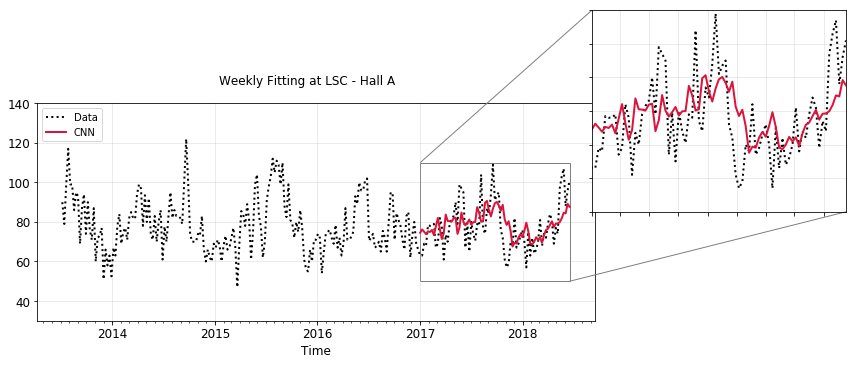

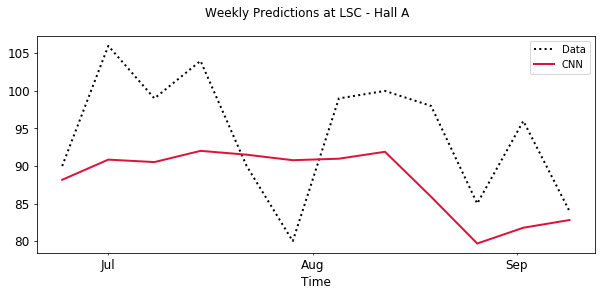

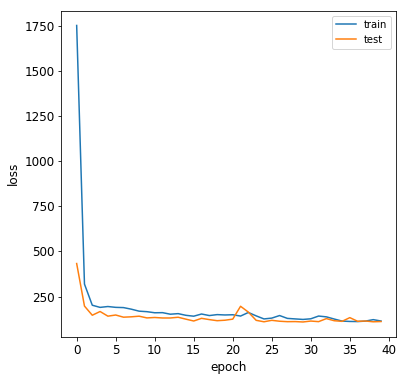

In [15]:
### Plotting ###
# general plot
### Plotting ###
# general plot
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))
plt.figure(1)
xaxis = ax.get_xaxis()
#ax.xaxis.grid(b=True, which='minor', color='0.90', linewidth=0.6)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))

ax.plot(pd.date_range(startday, periods=len(mdnRnA), freq='W'), mdnRnA, linewidth=2, color='k', linestyle=':') 
ax.plot(pd.date_range(startdaypred, periods=len(pred), freq='W'), pred, linewidth=2, linestyle='-',color='crimson')
plt.xlabel('Time')
plt.grid(True, alpha=.3)
ax.legend(['Data', 'CNN'], loc='upper left')
plt.ylim([30, 140])

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
axins = zoomed_inset_axes(ax, 1.7, loc='lower left', bbox_to_anchor=(640,140))
axins.plot(pd.date_range(startday, periods=len(mdnRnA), freq='W'), mdnRnA, linewidth=2, color='k', linestyle=':') 
axins.plot(pd.date_range(startdaypred, periods=len(pred), freq='W'), pred, linewidth=2, linestyle='-',color='crimson')
axins.set_xlim('2017-01-01', '2018-06-17')
plt.grid(True, alpha=.3)
axins.set_ylim(50, 110)

plt.xticks(visible=False)
plt.yticks(visible=False)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.suptitle('Weekly Fitting at LSC - Hall A')
plt.savefig('./fitting_CNN_weekly_D'+str(neurons[0])+'D'+str(neurons[1])+'_D1_e50_b10_ss52_ts52.eps', 
            bbox_inches='tight')

# ahead plot
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))# 
plt.figure(2)
xaxis = ax.get_xaxis()
#ax.xaxis.grid(b=True, which='minor', color='0.90', linewidth=0.6)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))

ax.plot(pd.date_range(startdayahead, periods=len(newValuesReal), freq='W'), newValuesReal, color='k', linestyle=':',
        linewidth=2)
ax.plot(pd.date_range(startdayahead, periods=len(newValues), freq='W'), newValues, linestyle='-', 
        color='crimson', linewidth=2)
ax.legend(['Data', 'CNN'], loc='upper right')
plt.xlabel('Time')
plt.suptitle('Weekly Predictions at LSC - Hall A')
plt.savefig('./detailedprediction_ANN_weekly_D'+str(neurons[0])+'D'+str(neurons[1])+'_D1_e50_b10_ss52_ts52.eps')

# summarize history for loss
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))# 6,6
plt.figure(3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#ax.set_yscale("log")
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
#plt.savefig('./loss_ANN_weekly_D'+str(neurons[0])+'D'+str(neurons[1])+'_D1_e50_b10_ss52_ts52.eps')

plt.show()

In [16]:
# fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))
# plt.figure(1)
# xaxis = ax.get_xaxis()
# #ax.xaxis.grid(b=True, which='minor', color='0.90', linewidth=0.6)
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_minor_locator(mdates.MonthLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# #ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))

# ax.plot(pd.date_range(startdaypred, periods=len(pred), freq='W'), 
#         mdnRnA[len(mdnRnA)-len(pred):len(mdnRnA)], linewidth=1, color='k') 
# ax.plot(pd.date_range(startdaypred, periods=len(pred), freq='W'), pred, linewidth=3, linestyle=':',color='b')
# ax.legend(['Data', 'CNN'])
# plt.xlabel('Time')
# #ax.plot(pd.date_range(startdayahead, periods=len(newValues), freq='W'), newValues, linestyle='--', color='b', linewidth=1 )
# #ax.plot(pd.date_range(startdayahead, periods=len(newValuesReal), freq='W'), newValuesReal, color='g', linewidth=1 )

# plt.suptitle('Weekly Predictions at LSC - Hall A')
# plt.show()

In [17]:
# ### Plotting ###
# # general plot
# fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))
# plt.figure(1)
# xaxis = ax.get_xaxis()
# #ax.xaxis.grid(b=True, which='minor', color='0.90', linewidth=0.6)
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_minor_locator(mdates.MonthLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# #ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))

# ax.plot(pd.date_range(startday, periods=len(mdnRnA), freq='W'), mdnRnA, linewidth=1, color='k') 
# ax.plot(pd.date_range(startdaypred, periods=len(pred), freq='W'), pred, linewidth=2, linestyle=':',color='b')
# plt.xlabel('Time')
# plt.ylim([30, 140])

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
# axins = zoomed_inset_axes(ax, 1.7, loc='lower left', bbox_to_anchor=(640,140))

# axins.plot(pd.date_range(startday, periods=len(mdnRnA), freq='W'), mdnRnA, linewidth=1, color='k') 
# axins.plot(pd.date_range(startdaypred, periods=len(pred), freq='W'), pred, linewidth=2, linestyle=':',color='b')

# axins.set_xlim('2017-01-01', '2018-06-17')
# axins.set_ylim(50, 110)

# plt.xticks(visible=False)
# plt.yticks(visible=False)

# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# plt.suptitle('Weekly Predictions at LSC - Hall A')
# #plt.savefig('./prediction_ANN_weekly_D'+str(neurons[0])+'D'+str(neurons[1])+'_D1_e50_b10_ss52_ts52.eps')
# plt.show()

In [18]:
# pd.date_range(startdaypred, periods=len(pred), freq='W')

In [ ]:
acctrain = []
acctest = []
for it in range(1, 100, 5):
    print("epochs = ", it)
    history = model.fit(trainX, trainY, epochs=it, batch_size=10, verbose=0, validation_data=(testX, testY)) 
    acc_train = np.average(history.history["acc"])
    acctrain.append(acc_train)
    acc_test = np.average(history.history["val_acc"])
    acctest.append(acc_test)

epochs =  1
epochs =  6
epochs =  11
epochs =  16
epochs =  21
epochs =  26
epochs =  31
epochs =  36
epochs =  41
epochs =  46
epochs =  51
epochs =  56
epochs =  61
epochs =  66


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(range(1, 100, 5), acctrain, 'o')
ax.plot(range(1, 100, 5), acctest, 'o')
plt.xlabel('$n_{epochs}$')
plt.ylabel('$acc$')
plt.legend(['Train', 'Test'])